<a href="https://colab.research.google.com/github/Boom-Ba/DataSciene/blob/main/Deep_learning_NN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [2]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_blobs

In [116]:
n_samples=10000

# centers=[(0.1,0.1),(0.9,0.9)]
four_centers=[(0.95,0.95),(0.01,0.01),(0.3,0.6),(0.8,0.7)]
#Hypothesis a random dataset with 2 features
X,y=make_blobs(n_samples=n_samples,n_features=2,cluster_std=0.1,centers=four_centers,shuffle=False,random_state=42)

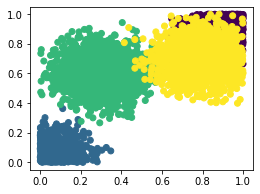

In [117]:
features=[]
labels=[]

for feature, label in zip(X,y):
  #filtering 
  if (feature[0]>=0 and feature[0]<=1.0 and feature[1]>=0 and feature[1]<=1.0):
    features.append(feature)
    labels.append(label)

#convert -> 2d Array
X=np.array(features)
y=np.array(labels)

#visualize clustered result
%matplotlib inline
from pylab import *
plt.figure(figsize=(4,3))
plt.scatter(X[:,0],X[:,1],c=y.astype(np.float))
plt.show()

In [118]:
##for non-binary classification
#METHOD - encoding: 
# e.x 4 classes- [0,1,2,3]
y=keras.utils.to_categorical(y)

In [106]:
y # 4 classes

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=7)

In [129]:
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model=Sequential() 
model.add(Dense(32, activation='relu',input_shape=X_train.shape[1:])) #nn for 4 classification chose dense -32
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax')) #binary classifier 2-sigmoid, multiple classifier 4- softmax

### In Keras, first we set up one layer NN with 16 hidden units in the network, and a final sigmoid function to do binary classification.

In [121]:
model.summary() #starts from 16 hidden units in dense_layer, and output to binary result.
                # for multiple classification, use dense_32, output as 4

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 32)                96        
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dense_31 (Dense)            (None, 4)                 68        
                                                                 
Total params: 692
Trainable params: 692
Non-trainable params: 0
_________________________________________________________________


In [134]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [135]:
train=model.fit(X_train, y_train, batch_size=100, epochs=10, verbose=2, validation_data=(X_test,y_test))

Epoch 1/10
55/55 - 1s - loss: 0.3036 - accuracy: 0.9078 - val_loss: 0.3025 - val_accuracy: 0.9007 - 692ms/epoch - 13ms/step
Epoch 2/10
55/55 - 0s - loss: 0.2790 - accuracy: 0.9139 - val_loss: 0.2806 - val_accuracy: 0.9212 - 121ms/epoch - 2ms/step
Epoch 3/10
55/55 - 0s - loss: 0.2579 - accuracy: 0.9259 - val_loss: 0.2596 - val_accuracy: 0.9226 - 119ms/epoch - 2ms/step
Epoch 4/10
55/55 - 0s - loss: 0.2400 - accuracy: 0.9323 - val_loss: 0.2430 - val_accuracy: 0.9241 - 115ms/epoch - 2ms/step
Epoch 5/10
55/55 - 0s - loss: 0.2252 - accuracy: 0.9350 - val_loss: 0.2298 - val_accuracy: 0.9292 - 125ms/epoch - 2ms/step
Epoch 6/10
55/55 - 0s - loss: 0.2118 - accuracy: 0.9367 - val_loss: 0.2170 - val_accuracy: 0.9292 - 139ms/epoch - 3ms/step
Epoch 7/10
55/55 - 0s - loss: 0.1999 - accuracy: 0.9400 - val_loss: 0.2063 - val_accuracy: 0.9307 - 119ms/epoch - 2ms/step
Epoch 8/10
55/55 - 0s - loss: 0.1910 - accuracy: 0.9407 - val_loss: 0.1973 - val_accuracy: 0.9307 - 118ms/epoch - 2ms/step
Epoch 9/10
55/5

In [136]:
#evaluate
# One-Layer NN can achive the optmized result with SVM, KNN
score=model.evaluate(X_test,y_test,verbose=1)

print('Loss:{},  Accuracy:{}'.format(score[0],score[1]))

43/43 [==============================] - 0s 1ms/step - loss: 0.1831 - accuracy: 0.9372
Loss:0.18311631679534912,  Accuracy:0.9372262954711914


### Adding one more dense layer improves 20% accuracy, and also when we separate centers as far as each other, the task itself is easier than the case when we have overlapping centers, and the NN model performs better for sure.